In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных и первичный анализ

In [3]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data = data[~(data.eq("?").any(axis=1))] # удаление всех строк, где пропущены значения (Алтернатива - попробовать заменить их модой или медианой и так далее)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


# Построение графиков и нахождение зависимостей

## Выбор количественных данных

<Figure size 800x640 with 0 Axes>

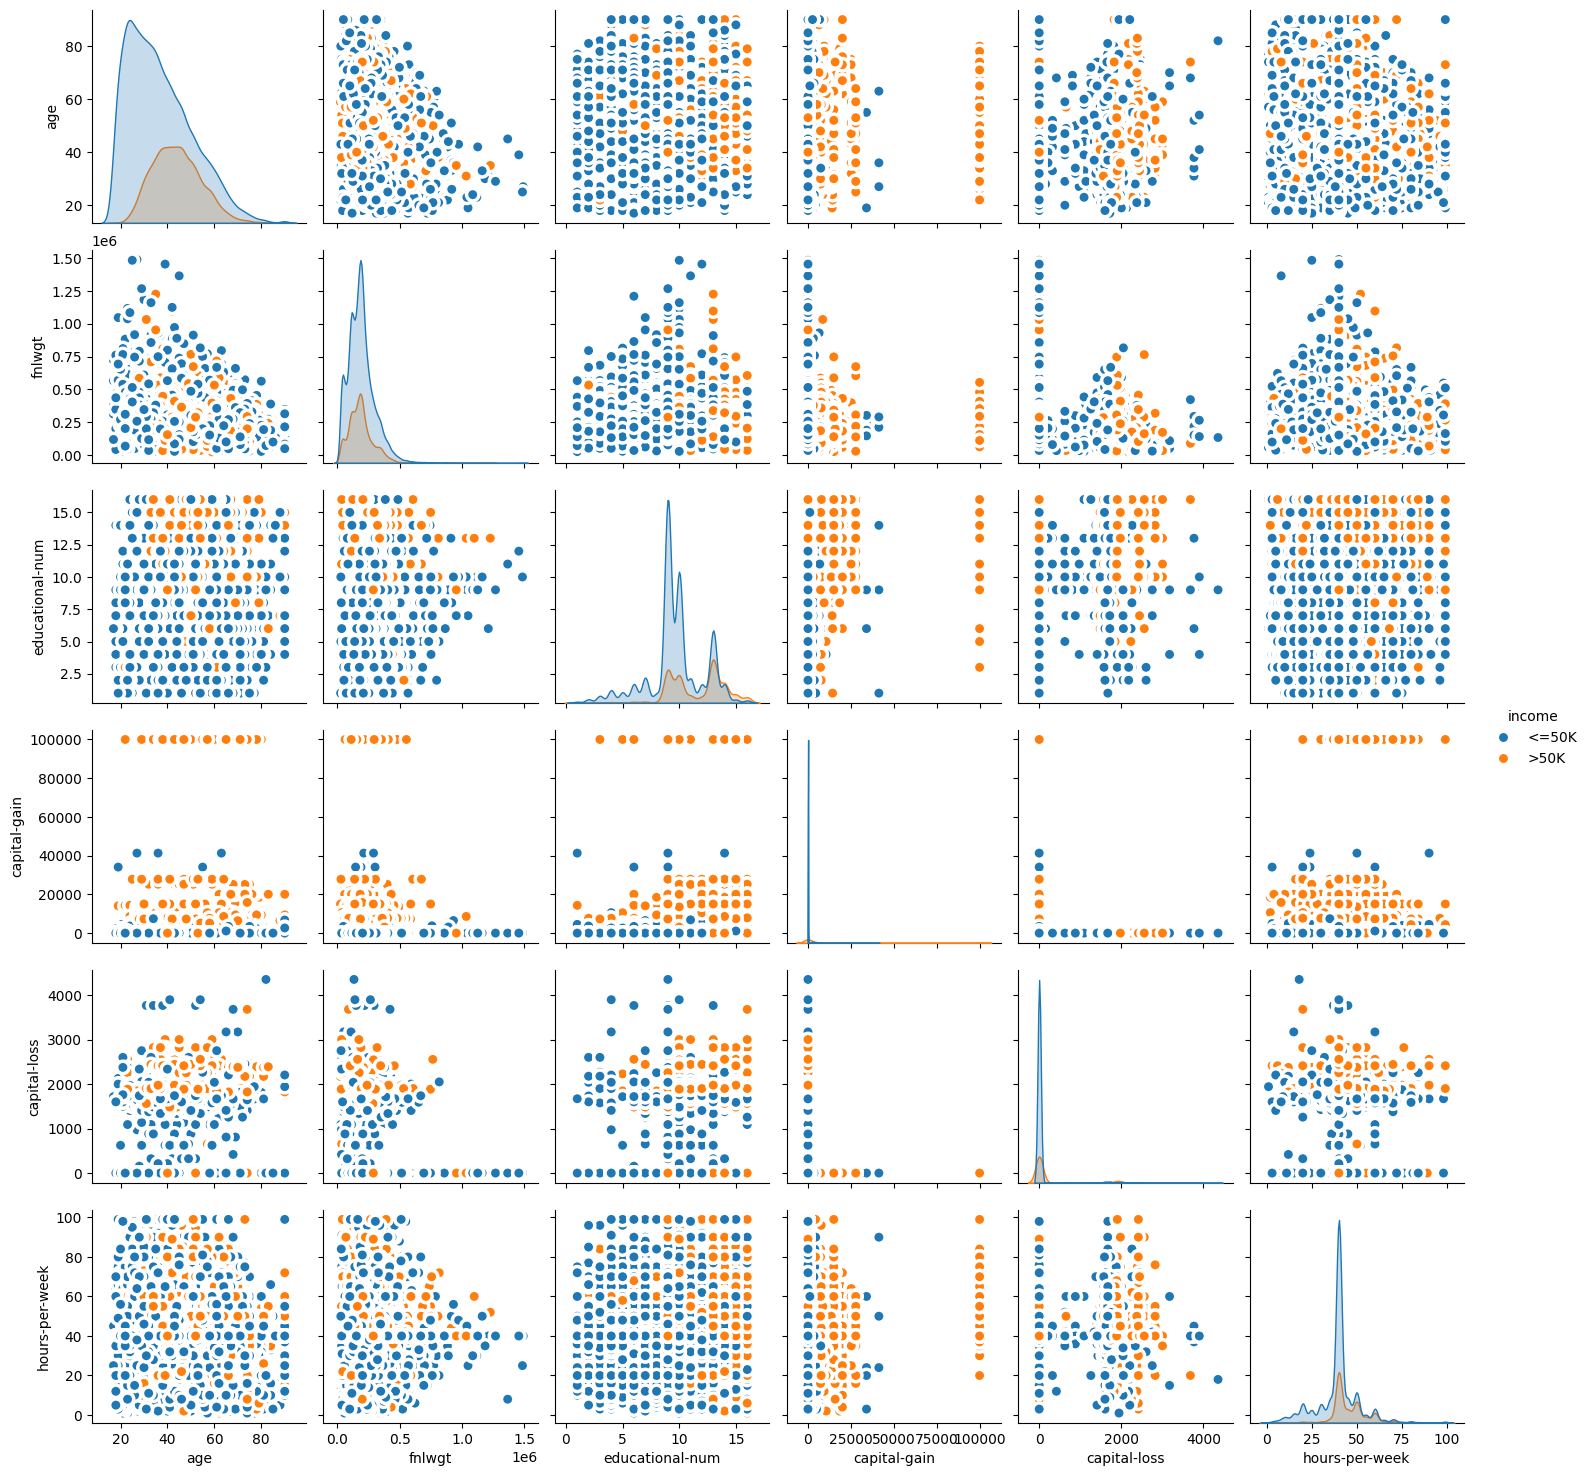

In [63]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, kind="scatter", hue="income", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

График позволяет понять, что довольно неплохое разделение на группы идёт у следующих признаков: capital-gain, educational-num и age. А также я бы выделил hours-per-week и capital-loss (хотя он показали результат похуже).

## Выбор категориальных данных

In [36]:
tips_categorial = data[
    ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country", "income"]
]
tips_categorial.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [37]:
from scipy.stats import chi2_contingency

In [38]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

In [39]:
rows = []

for var1 in tips_categorial:
    col = []
    for var2 in tips_categorial:
        cramers = cramers_V(tips_categorial[var1], tips_categorial[var2])
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)
df_categorial = pd.DataFrame(cramers_results, columns=tips_categorial.columns, index=tips_categorial.columns)

<Axes: >

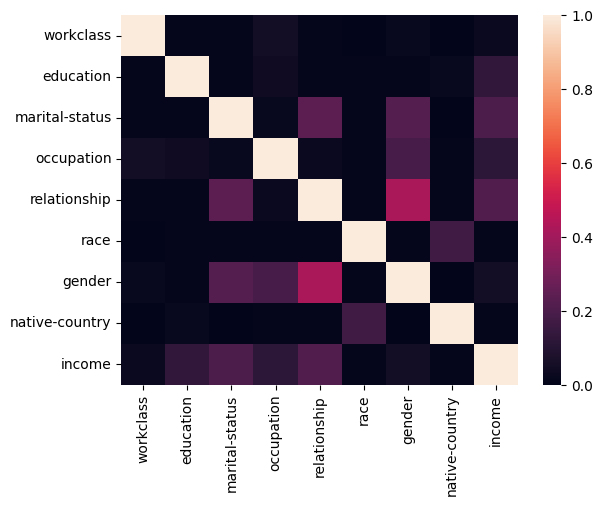

In [41]:
sns.heatmap(df_categorial)

График позволяет понять, что довольно неплохое коррелирование с Y у следующих признаков: marital-status, relationship, education и occupation

# Разбиение на X и Y всех признаков

In [10]:
X = data.drop('income', axis=1)

In [18]:
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

le.fit(data["income"])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [15]:
le.transform(["<=50K", ">50K"])

array([0, 1])

In [17]:
y = pd.Series(le.transform(data["income"]))

# Логистическая регрессия на всех признаках

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [74]:
log_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
len(X_train) + len(X_test) == len(X)

True

In [77]:
log_model.fit(X_train, y_train)

y_predict = log_model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [78]:
log_model.predict_proba(X_test)

array([[0.99279422, 0.00720578],
       [0.90870545, 0.09129455],
       [0.63807661, 0.36192339],
       ...,
       [0.7951399 , 0.2048601 ],
       [0.8118548 , 0.1881452 ],
       [0.98782982, 0.01217018]])

In [79]:
log_model.score(X_train, y_train)

0.8460071316029522

In [80]:
log_model.score(X_test, y_test)

0.8479823106688779

In [81]:
Y.value_counts() #чтобы понимать, что у нас не 15% >50K, так как модель могла бы всегда говорить - <=50K

income
<=50K     34014
>50K      11208
dtype: int64

# SVC на всех признаках

In [82]:
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [83]:
clf.score(X_train, y_train)

0.8500704867733643

In [84]:
clf.score(X_test, y_test)

0.8507462686567164

# Разбиение на X и Y выбранных признаков

In [85]:
X = data.drop('income', axis=1)
X = pd.get_dummies(X[
    ["hours-per-week", "capital-loss", "education", "educational-num", "age", 
     "capital-gain", "marital-status", "relationship", "occupation"]
])
X.head()

,hours-per-week,capital-loss,educational-num,age,capital-gain,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,40,0,7,25,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,50,0,9,38,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,40,0,12,28,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,0,10,44,7688,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,30,0,6,34,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

# Логистическая регрессия на выбранных признаках

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
log_model.fit(X_train, y_train)

y_predict = log_model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [89]:
log_model.predict_proba(X_test)

array([[0.99279422, 0.00720578],
       [0.90870545, 0.09129455],
       [0.63807661, 0.36192339],
       ...,
       [0.7951399 , 0.2048601 ],
       [0.8118548 , 0.1881452 ],
       [0.98782982, 0.01217018]])

In [90]:
log_model.score(X_train, y_train)

0.8460071316029522

In [91]:
log_model.score(X_test, y_test)

0.8479823106688779

# SVC на выбранных признаках

In [92]:
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [93]:
clf.score(X_train, y_train)

0.8500704867733643

In [94]:
clf.score(X_test, y_test)

0.8507462686567164

# Вывод

Я создал 4 модели, смог поработать с категориальными данными, преобразуя их в числовые. 
Несмотря на то, что модели со всеми признаками показали чуть лучше результат, я всё равно остановился бы на том, чтобы 
именно выбирать те признаки, которые весомо отражаются на качестве предсказаний модели.
Разница между Логистической регрессией и SVC почти не заметна.
Считаю, что модели показали неплохие результаты, но не очень точные (я бы хотел добиться 93+% точности).
Чтобы улучшить результат, я бы попробовал настроить параметры моделей, а также не избавляться от строк с пропущенными данными.